In [1]:
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
#Download training and testing data
file_path1 = r'C:\Users\Sofia Beyerlein\Desktop\Cornell Graduate\Applied Machine Learning\hw1\test.csv'
df1 = pd.read_csv(file_path1)
test_ids = df1['Id']

file_path2 = r'C:\Users\Sofia Beyerlein\Desktop\Cornell Graduate\Applied Machine Learning\hw1\train.csv'
df2 = pd.read_csv(file_path2)

Three examples of continuous data in the set: BsmtFinSF, 1stFlrSF, GarageArea
Three examples of categorical data in the set: LotShape, Neighborhood, and RoofStyle


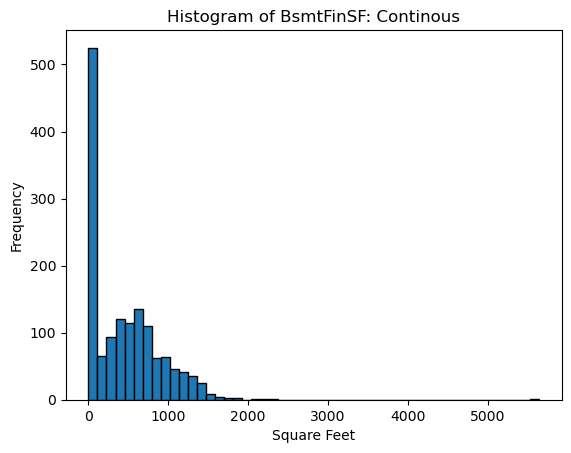

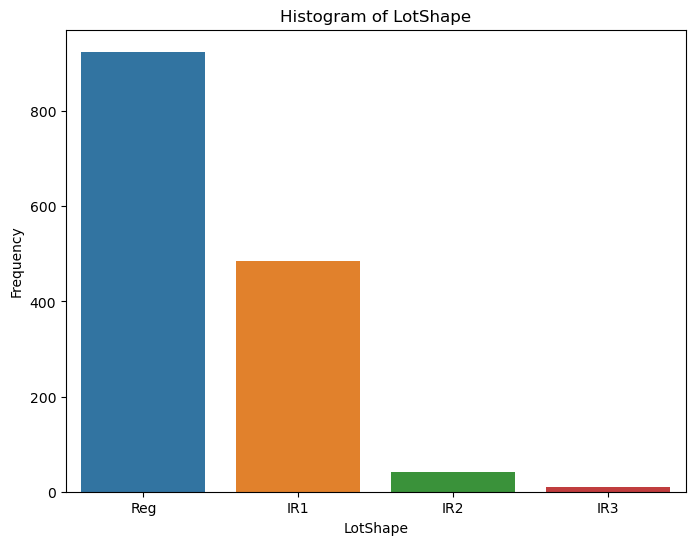

In [3]:
#give three examples of continuous and categorical features in the dataset and graph
print("Three examples of continuous data in the set: BsmtFinSF, 1stFlrSF, GarageArea")
print("Three examples of categorical data in the set: LotShape, Neighborhood, and RoofStyle")

BsmtFinSF_arr = df2.iloc[:, 34]
plt.hist(BsmtFinSF_arr, bins = 50, edgecolor='black')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.title('Histogram of BsmtFinSF: Continous')

LotShape_counts = df2['LotShape'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='LotShape', data=df2, order=LotShape_counts.index)
plt.title('Histogram of LotShape')
plt.xlabel('LotShape')
plt.ylabel('Frequency')
plt.show()

In [4]:
#Preprocessing the data, explain preprocessing steps and the reasons why you need to preprocess
#cleaning training
df2['LotFrontage'].fillna(df2['LotFrontage'].median(), inplace=True)
df2['LotArea'].fillna(df2['LotArea'].median(), inplace=True)
df2['YearBuilt'].fillna(df2['LotArea'].median(), inplace=True)
df2['LotShape'].fillna('None', inplace=True)
df2['BldgType'].fillna('None', inplace=True)
df2['HouseStyle'].fillna('None', inplace=True)

#cleaning testing
df1['LotFrontage'].fillna(df1['LotFrontage'].median(), inplace=True)
df1['LotArea'].fillna(df1['LotArea'].median(), inplace=True)
df1['YearBuilt'].fillna(df1['LotArea'].median(), inplace=True)
df1['LotShape'].fillna('None', inplace=True)
df1['BldgType'].fillna('None', inplace=True)
df1['HouseStyle'].fillna('None', inplace=True)

print("The preprocessing steps are looping through the training and testing data and removing the NA values. The reasons why we preprocess data is to make sure there are no outliers that skew the results.")

The preprocessing steps are looping through the training and testing data and removing the NA values. The reasons why we preprocess data is to make sure there are no outliers that skew the results.


Some features that could use one-hot encoding are: LotShape, LotConfig, and BldgType. The reason we use one-hot encoding is to give non-numerical data a numerical representation that algorithms can process.


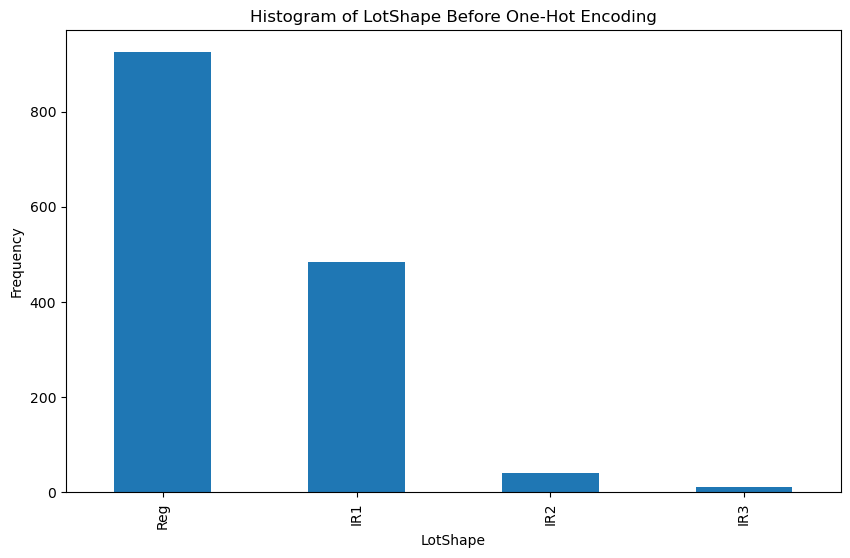

NameError: name 'LS_ohe_train' is not defined

In [5]:
#one-hot encoding
print("Some features that could use one-hot encoding are: LotShape, LotConfig, and BldgType. The reason we use one-hot encoding is to give non-numerical data a numerical representation that algorithms can process.")

df1_combined = pd.get_dummies(df1, drop_first = True)
df2_combined = pd.get_dummies(df2, drop_first= True)

df1_combined = df1_combined.reindex(columns=df2_combined.columns, fill_value=0)

plt.figure(figsize=(10, 6))
df2['LotShape'].value_counts().plot(kind='bar')
plt.title('Histogram of LotShape Before One-Hot Encoding')
plt.xlabel('LotShape')
plt.ylabel('Frequency')
plt.show()

#plotting after one-hot
fig, axes = plt.subplots(1, len(LS_ohe_train.columns), figsize=(20, 6))
for i, col in enumerate(LS_ohe_train.columns):
    LS_ohe_train[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Histogram of {col} After One-Hot Encoding')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [25]:
# Using OLS
columns_to_include = ['LotFrontage', 'LotArea', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'YearBuilt']

target = 'SalePrice'

#features and target var
x = df2_combined[columns_to_include] #train
y = df2_combined[target] #train
test = df1_combined[columns_to_include] #test that you want to predict on

#train model on dataset
model = LinearRegression()
model.fit(x, y)

#predict
y_prediction_complete = model.predict(test) #predicting on the actual test

# Example: Load actual sale prices from a CSV file
y = y.drop(y.index[-1])
mse = mean_squared_error(y, y_prediction_complete)
r2 = 3

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("MSE sqrt: ", np.sqrt(mse))

#CSV file 
results_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_prediction_complete
})

results_df.to_csv('predictions.csv', index=False)

print(results_df)

Mean Squared Error (MSE): 8774006875.9908
R² Score: 3
MSE sqrt:  23417.417230544983
        Id      SalePrice
0     1461  163219.221790
1     1462  175277.353393
2     1463  252728.751095
3     1464  251328.479237
4     1465  174923.731515
...    ...            ...
1454  2915  116693.716091
1455  2916  142708.124502
1456  2917  232991.532395
1457  2918  169714.422600
1458  2919  229551.966740

[1459 rows x 2 columns]
